# Пример анализа данных
## Open Policing Project
### Датасет содержит информацию об остановках автомобилей полицией

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [192]:
# загрузить данные в DataFrame
poldf = pd.read_csv('police.csv')
poldf

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,20:27,NaN,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91737,2015-12-31,20:35,NaN,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
91738,2015-12-31,20:45,NaN,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,NaN,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [3]:
# проверить размеры датафрейма
len(poldf)

91741

In [4]:
# проверить типы данных в датафрейме
poldf.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [38]:
# проверить количество отсутствующих данных
poldf.isna().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

### 1. Удалить столбец, в котром отсутствуют данные

- Методы drop, dropna
- Обратить внимание на аргументы по-умолчанию
- Проверить результат

In [51]:
poldf.dropna(axis = 0, how = 'any', thresh=None ,subset = None, inplace = True)

In [183]:
poldf = poldf.drop(columns = 'county_name')

In [53]:
poldf.isnull().sum()

stop_date             0
stop_time             0
county_name           0
driver_gender         0
driver_age_raw        0
driver_age            0
driver_race           0
violation_raw         0
violation             0
search_conducted      0
search_type           0
stop_outcome          0
is_arrested           0
stop_duration         0
drugs_related_stop    0
dtype: int64

### 2. Кто чаще нарушает скоростной режим - женщины или мужчины?

- Столбцы: driver_gender, violation
- Разные способы ответить на вопрос

In [61]:
man=poldf[poldf['driver_gender'] == 'M']
len(man)

62895

In [62]:
woman=poldf[poldf['driver_gender'] == 'F']
len(woman)

23511

In [63]:
if len(man) > len(woman):
    print('Мужчины нарушают чаще')
elif len(woman) > len(man):
    print('Женщины нарушают чаще')
else:
    print('Одинаково нарушают')

Мужчины нарушают чаще


### 3. Влияет ли пол водителя на проведение розыска во время остановки?

- Столбцы: driver_gender, search_conducted
- Трудно определить причинно-следственную связь, но можно выявить отношения
- Использовать все доступные факторы для выявления отношений

In [64]:
man=poldf[(poldf['driver_gender'] == 'M')&(poldf['search_conducted'] == True)]
len(man)

2725

In [65]:
woman=poldf[(poldf['driver_gender'] == 'F')&(poldf['search_conducted'] == True)]
len(woman)

471

In [66]:
if len(man) > len(woman):
    print('Мужчины помогают чаще')
elif len(woman) > len(man):
    print('Женщины помогают чаще')
else:
    print('Не важно')

Мужчины помогают чаще


### 4. Почему вид розыска (search_type) так часто отсутствует?

- Столбцы: driver_gender, search_conducted
- pandas во время расчетов по-умолчанию выбрасывает отсутствующие данные (Null, NA, NaN, False)
- Использовать все доступные факторы для выявления отношений

In [85]:
typ = poldf['search_type'].isnull().sum()
typ

88545

In [84]:
typ2 = poldf[poldf['search_conducted'] == False]
len(typ2)

88545

In [86]:
if typ == len(typ2):
    print('Вид розыска отсутствует из-за отсутсвия самого розыска')
else:
    print('Причина неизвестна')

Вид розыска отсутствует из-за отсутсвия самого розыска


### 5. Как часто водителя обыскивают (Protective Frisk)?

- Столбцы: search_type
- строковые методы для поиска частичных совпадений

In [92]:
pf1 = poldf['search_type']
len(pf1)

91741

In [93]:
pf2 = poldf['search_type'].isnull().sum()
pf2

88545

In [94]:
pf3 = poldf[poldf['search_type'] == 'Protective Frisk']
len(pf3)

161

In [99]:
pf4 = len(pf1) - pf2 #Кол-во розысков
pf4 = len(pf3)/pf4 
print('Шанс обыска: ')
print(pf4)

Шанс обыска: 
0.050375469336670836


### 6. В каком году меньше всего полиция останавливала автомобили?

- Столбцы: stop_date, stop_time
- тип данных datetime и его методы

In [107]:
t1 = poldf[(poldf['stop_date'] >= '2005-01-01')& (poldf['stop_date'] < '2006-01-01')]
d1 = '2005'
t2 = poldf[(poldf['stop_date'] >= '2006-01-01')& (poldf['stop_date'] < '2007-01-01')]
if len(t2) < len(t1):
    t1 = t2
    d1 = '2006'
t2 = poldf[(poldf['stop_date'] >= '2007-01-01')& (poldf['stop_date'] < '2008-01-01')]
if len(t2) < len(t1):
    t1 = t2
    d1 = '2007'
t2 = poldf[(poldf['stop_date'] >= '2008-01-01')& (poldf['stop_date'] < '2009-01-01')]
if len(t2) < len(t1):
    t1 = t2
    d1 = '2008'
t2 = poldf[(poldf['stop_date'] >= '2009-01-01')& (poldf['stop_date'] < '2010-01-01')]
if len(t2) < len(t1):
    t1 = t2
    d1 = '2009'
t2 = poldf[(poldf['stop_date'] >= '2010-01-01')& (poldf['stop_date'] < '2011-01-01')]
if len(t2) < len(t1):
    t1 = t2
    d1 = '2010'
t2 = poldf[(poldf['stop_date'] >= '2011-01-01')& (poldf['stop_date'] < '2012-01-01')]
if len(t2) < len(t1):
    t1 = t2
    d1 = '2011'
t2 = poldf[(poldf['stop_date'] >= '2012-01-01')& (poldf['stop_date'] < '2013-01-01')]
if len(t2) < len(t1):
    t1 = t2
    d1 = '2012'
t2 = poldf[(poldf['stop_date'] >= '2013-01-01')& (poldf['stop_date'] < '2014-01-01')]
if len(t2) < len(t1):
    t1 = t2
    d1 = '2013'
t2 = poldf[(poldf['stop_date'] >= '2014-01-01')& (poldf['stop_date'] < '2015-01-01')]
if len(t2) < len(t1):
    t1 = t2
    d1 = '2014'
t2 = poldf[(poldf['stop_date'] >= '2015-01-01')& (poldf['stop_date'] < '2016-01-01')]
if len(t2) < len(t1):
    t1 = t2
    d1 = '2015'

print(d1)
len(t1)

2005


2558

### 7. Как изменялось количество остановок, связанных с запрещенными веществами, в течение дня?

- Столбцы: stop_datetime, drug_related_stop
- groubby
- plot

In [119]:
grp = poldf.groupby(['stop_time','drugs_related_stop'])
grp.first()

stop_date driver_gender  driver_age_raw  \
stop_time drugs_related_stop                                             
00:00     False               2005-10-02             F          1982.0   
          True                2005-10-01             M          1988.0   
00:01     False               2006-01-30             M          1963.0   
          True                2007-12-01             M          1991.0   
00:02     False               2006-01-15             M          1989.0   
...                                  ...           ...             ...   
23:57     True                2009-04-15             M          1984.0   
23:58     False               2006-03-02             M          1986.0   
          True                2007-08-05             M          1987.0   
23:59     False               2006-01-14             M          1966.0   
          True                2007-09-03             M          1989.0   

                              driver_age driver_race  \
stop_time drugs_related_stop                           
00:00     False                     23.0       White   
          True                      17.0       White   
00:01     False                     43.0       White   
          True                      16.0       Black   
00:02     False                     17.0       White   
...                                  ...         ...   
23:57     True                      25.0       Black   
23:58     False                     20.0       White   
          True                      20.0       White   
23:59     False                     40.0       White   
          True                      18.0    Hispanic   

                                               violation_raw  \
stop_time drugs_related_stop                                   
00:00     False                                     Speeding   
          True                Equipment/Inspection Violation   
00:01     False                                     Speeding   
          True                Equipment/Inspection Violation   
00:02     False                                     Speeding   
...                                                      ...   
23:57     True                Equipment/Inspection Violation   
23:58     False                                     Speeding   
          True                       Other Traffic Violation   
23:59     False                                     Speeding   
          True                Equipment/Inspection Violation   

                                     violation  search_conducted  \
stop_time drugs_related_stop                                       
00:00     False                       Speeding             False   
          True                       Equipment              True   
00:01     False                       Speeding             False   
          True                       Equipment              True   
00:02     False                       Speeding             False   
...                                        ...               ...   
23:57     True                       Equipment              True   
23:58     False                       Speeding             False   
          True                Moving violation              True   
23:59     False                       Speeding             False   
          True                       Equipment              True   

                                                      search_type  \
stop_time drugs_related_stop                                        
00:00     False                              Reasonable Suspicion   
          True                                     Probable Cause   
00:01     False               Probable Cause,Reasonable Suspicion   
          True                                 Incident to Arrest   
00:02     False                                Incident to Arrest   
...                                                           ...   
23:57     True                                     Probable Cause   


In [145]:
zap = poldf[['stop_time','drugs_related_stop']]
plt = zap.plot(x = 'stop_time', y = 'drugs_related_stop')
# не нашёл как перевести drugs_related_stop в float внутри plot
plt

TypeError: no numeric data to plot

### 8. Верно ли, что большинство остановок происходило ночью?

- Столбцы: stop_datetime
- groubby
- plot

In [148]:
nigh = poldf.groupby(['stop_time'])
nigh.first()

,stop_date,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
stop_time,,,,,,,,,,,,,
00:00,2005-10-01,M,1988.0,17.0,White,Equipment/Inspection Violation,Equipment,True,Probable Cause,Arrest Driver,True,16-30 Min,True
00:01,2006-01-30,M,1963.0,43.0,White,Speeding,Speeding,False,"Probable Cause,Reasonable Suspicion",Citation,False,16-30 Min,False
00:02,2006-01-15,M,1989.0,17.0,White,Speeding,Speeding,False,Incident to Arrest,Citation,False,0-15 Min,False
00:03,2006-07-07,F,1975.0,31.0,White,Speeding,Speeding,False,"Incident to Arrest,Probable Cause",Citation,False,0-15 Min,False
00:04,2006-03-15,M,1984.0,22.0,White,Speeding,Speeding,False,Probable Cause,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23:55,2005-10-09,M,1985.0,20.0,White,Speeding,Speeding,False,"Inventory,Probable Cause",Citation,False,0-15 Min,False
23:56,2005-10-21,M,1983.0,22.0,White,Speeding,Speeding,False,Probable Cause,Citation,False,0-15 Min,False
23:57,2005-11-26,M,1977.0,28.0,White,Speeding,Speeding,False,Incident to Arrest,Citation,False,0-15 Min,False


In [158]:
n1 = poldf[(poldf['stop_time'] < '07:00')&(poldf['stop_time'] >= '00:00')]
print(len(n1))
n2 = poldf[(poldf['stop_time'] <= '23:59')&(poldf['stop_time'] >= '07:00')]
print(len(n2))

17564
74177


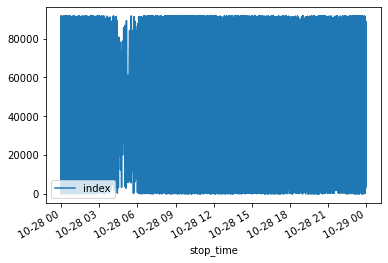

In [161]:
n3 = poldf.reset_index().plot(x = 'stop_time', y='index' )

### 9. Найти плохие данные в столбце stop_duration (длительность остановки) и исправить их.

- Столбцы: stop_datetime
- loc

In [184]:
mm = poldf.loc[(poldf.stop_duration != '0-15 Min') & (poldf.stop_duration != '16-30 Min') & (poldf.stop_duration != '30+ Min')]
mm

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
25,2005-09-03,16:02,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
29,2005-09-26,01:05,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
52,2005-10-01,13:09,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
110,2005-10-03,19:50,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
124,2005-10-04,11:43,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91637,2015-12-27,09:41,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
91660,2015-12-28,02:28,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
91674,2015-12-28,12:01,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
91710,2015-12-30,13:27,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False


In [185]:
poldf.loc[(poldf.stop_duration != '0-15 Min') & (poldf.stop_duration != '16-30 Min') & (poldf.stop_duration != '30+ Min')] = '30+ Min'
#исправление

In [186]:
mm = poldf.loc[(poldf.stop_duration != '0-15 Min') & (poldf.stop_duration != '16-30 Min') & (poldf.stop_duration != '30+ Min')]
mm

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop


### 10. Каково среднее время остановки (stop_duration) для каждого нарушения (violation_raw)?

- Столбцы: stop_duration, violation_raw
- Преобразование строк в числа
- Важно не только среднее, но и количество

In [193]:
sr = poldf.groupby('violation_raw')
sr.first()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
violation_raw,,,,,,,,,,,,,,
APB,2005-10-05,16:10,NaN,M,1979.0,26.0,White,Other,False,Incident to Arrest,Citation,False,0-15 Min,False
Call for Service,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Other,False,Incident to Arrest,Arrest Driver,True,16-30 Min,False
Equipment/Inspection Violation,2005-03-23,09:45,NaN,M,1982.0,23.0,Black,Equipment,False,Probable Cause,Citation,False,0-15 Min,False
Motorist Assist/Courtesy,2005-10-12,07:50,NaN,M,0.0,32.0,White,Other,False,Incident to Arrest,No Action,False,0-15 Min,False
Other Traffic Violation,2005-08-07,16:50,NaN,M,1953.0,52.0,White,Moving violation,False,"Incident to Arrest,Protective Frisk",Citation,False,0-15 Min,False
Registration Violation,2005-10-03,23:20,NaN,M,1954.0,51.0,White,Registration/plates,False,Incident to Arrest,Citation,False,0-15 Min,False
Seatbelt Violation,2012-12-01,10:20,NaN,M,1970.0,42.0,Black,Seat belt,False,"Probable Cause,Protective Frisk",Citation,False,0-15 Min,False
Special Detail/Directed Patrol,2005-10-04,00:36,NaN,M,1961.0,44.0,White,Other,False,Protective Frisk,Arrest Driver,True,30+ Min,False
Speeding,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,False,Incident to Arrest,Citation,False,0-15 Min,False


In [202]:
v1 = poldf.loc[poldf.violation_raw=='APB']
vr = v1.stop_duration.mode()
print(len(v1))
print(vr)


79
0    0-15 Min
dtype: object


### 11. Визуализировать результаты пункта 10

- Не использовать plot для категориальных данных
- Сортировка и ориентация графика даст лучший результат

### 12. Рассчитать возрастное распределение для каждого нарушения

- Гистограммы (метод hist) - для визуализации распределений

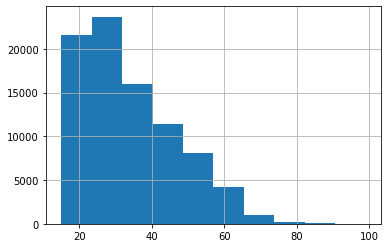

In [194]:
h = poldf['driver_age'].hist()
fig = h.get_figure()

### 13. Представьте, что столбца возраст водителя (driver_age) нет. Создать аналогичный столбец на основе года рождения (driver_age_raw) и назвать его (driver_age_new).

- head и tail могут быть не репрезентативны
- даже если в столбце данные частично отсутствуют, оставшиеся могут быть не корректными
- гистограммы - хороший способ проверить корректность выполненных преобразований